In [151]:
import numpy as np
import pandas as pd

In [152]:
df = pd.read_csv("iris.csv")

In [153]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Id column is not required that's why I'm droping this column

In [154]:
df.drop(columns=['Id'] , inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Converting Species column to numerical where 
*versicolor --> 0*<br>
*virginica --> 1*<br>
*setosa --> 2*

In [155]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [156]:
Species=[]
for specie_name in df.Species:
#     print(val,end='***')
    val_split = specie_name.split('-')
#     print(val_split,end='***')
    val = val_split[-1]
    Species.append(val)

In [157]:
df.Species = Species

In [158]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [159]:
df.Species.replace({'versicolor':0 , "virginica":1 , 'setosa':2} , inplace = True)

In [160]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [161]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [162]:
X = df.drop(columns=["Species"])
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [163]:
Y = df.Species
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Species, dtype: int64

In [164]:
#Used to split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [165]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape )

(120, 4) (30, 4) (120,) (30,)


#### Will use GridSearchCv to search the best model 

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , ShuffleSplit , GridSearchCV

In [167]:
#Just for different shuffle the accuracy
Cv = ShuffleSplit( n_splits=5,test_size=.2,random_state=19)

cross_val_score(LogisticRegression(), X, Y , cv = Cv)

C:\Users\idofa\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1.        , 0.9       , 0.9       , 0.93333333, 1.        ])

In [168]:
def find_best_model_using_gridsearchcv(X , y):
    algos = {
        "Logistic_Regression" : {
            "model": LogisticRegression() , 
            "params" :{
                "penalty" : ['l1', 'l2', 'elasticnet', 'none']
            }
    } , 
    
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params" : {
            "criterion": ['gini', 'entropy'],
            "splitter" : ["best","random"]
            }
        }    
    }
    
    scores=[]
    cv = ShuffleSplit(n_splits=10, test_size=0.2,random_state=0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config["model"] , config["params"] , cv = Cv , return_train_score=False )
        gs.fit(X , y)
        scores.append({
            "model" : algo_name,
            "best_score":gs.best_score_ , 
            "best_params": gs.best_params_
        })
        
        print("model:- " , algo_name,"best_score:- ",gs.best_score_ , "best_params:- " , gs.best_params_)
#         print(scores)

#     return pd.DataFrame(scores , columns=["model" , "best_score" , " best_params"])

In [169]:
find_best_model_using_gridsearchcv(x_train , y_train)

C:\Users\idofa\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\idofa\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\idofa\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\idofa\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-tes

model:-  Logistic_Regression best_score:-  0.9916666666666668 best_params:-  {'penalty': 'l2'}
model:-  decision_tree best_score:-  0.95 best_params:-  {'criterion': 'gini', 'splitter': 'random'}


C:\Users\idofa\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.99166667        nan 0.96666667]
  warnings.warn(


In [170]:
model = DecisionTreeClassifier(criterion = 'gini' , splitter= 'random')

In [171]:
model.fit(x_train , y_train)

DecisionTreeClassifier(splitter='random')

**Read This :-** 'https://stackoverflow.com/questions/65801719/convert-series-to-2d-array'

In [172]:
type(y_test) , y_test.shape

(pandas.core.series.Series, (30,))

In [174]:
y_test = np.array(y_test.values.tolist())
y_test = y_test.reshape(-1,1)
type(y_test) , y_test.shape

(numpy.ndarray, (30, 1))

In [175]:
y_pred = model.predict(x_test)

**Read This :-**https://tinyurl.com/MultipleListToDataframe

In [176]:
data = {"Y_pred":y_pred , "Y_actual":y_test.ravel()}
new_df = pd.DataFrame(data)
new_df.head()

,Y_pred,Y_actual
0,0,0
1,1,1
2,2,2
3,0,0
4,2,2


### Now will use confusion matrix 
**Read this article: -** ('https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea')

In [177]:
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[12  1  0]
 [ 0  7  0]
 [ 0  0 10]]


**Read This :-**https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

<AxesSubplot:>

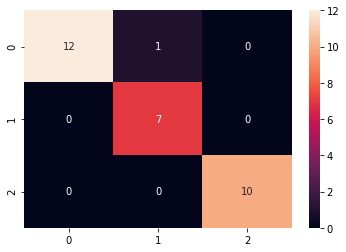

In [178]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

## Let's save this model

In [179]:
import pickle

In [180]:
with open('model_pickle','wb') as file:
    pickle.dump(model,file)

In [181]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [183]:
(x_train.head(1)).shape

(1, 4)

In [184]:
check = [5.1 , 3.5 , 1.4 , 0.2]
print(type(check) , len(check))
check = np.array(check).reshape(1 , -1)
print(type(check) , (check.shape))

<class 'list'> 4
<class 'numpy.ndarray'> (1, 4)


In [185]:
mp.predict(check)

array([2], dtype=int64)

In [186]:
answer = mp.predict(check)[0]
print(answer)

2


In [114]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
